In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import numpy as np

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 데이터 전처리: 날짜 열 제거 및 결측값 처리
df = df.drop(columns=['date'])
df = df.fillna(0)

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA 적용 (주성분 15개)
pca = PCA(n_components=15)
df_pca = pca.fit_transform(df_scaled)

# Isolation Forest 모델 훈련
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df_pca)

# 이상치 예측
outliers = iso_forest.predict(df_pca)
outliers_index = np.where(outliers == -1)[0]

# 원래 데이터에서 이상치 항목 찾기
original_outliers = df.iloc[outliers_index]

# 이상치 데이터 저장
original_outliers.to_csv('isolated_outliers.csv', index=False)

print("이상치 탐지가 완료되었습니다. 'isolated_outliers.csv' 파일에 저장되었습니다.")


이상치 탐지가 완료되었습니다. 'isolated_outliers.csv' 파일에 저장되었습니다.


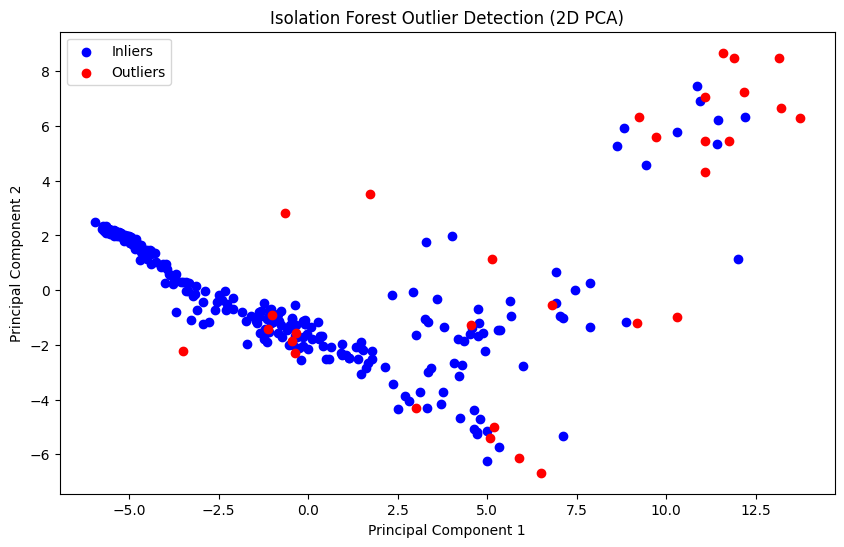

In [ ]:
import matplotlib.pyplot as plt

# PCA 적용 (주성분 2개)
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

# 이상치 마커
outliers = iso_forest.predict(df_pca)
outlier_mask = outliers == -1
inlier_mask = outliers == 1

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d[inlier_mask, 0], df_pca_2d[inlier_mask, 1], c='blue', label='Inliers')
plt.scatter(df_pca_2d[outlier_mask, 0], df_pca_2d[outlier_mask, 1], c='red', label='Outliers')
plt.title('Isolation Forest Outlier Detection (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


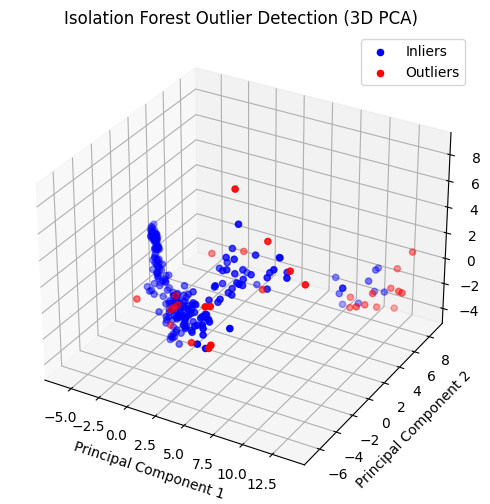

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# PCA 적용 (주성분 3개)
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# 시각화
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_3d[inlier_mask, 0], df_pca_3d[inlier_mask, 1], df_pca_3d[inlier_mask, 2], c='blue', label='Inliers')
ax.scatter(df_pca_3d[outlier_mask, 0], df_pca_3d[outlier_mask, 1], df_pca_3d[outlier_mask, 2], c='red', label='Outliers')
ax.set_title('Isolation Forest Outlier Detection (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [ ]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")


Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
폰트 설정 완료


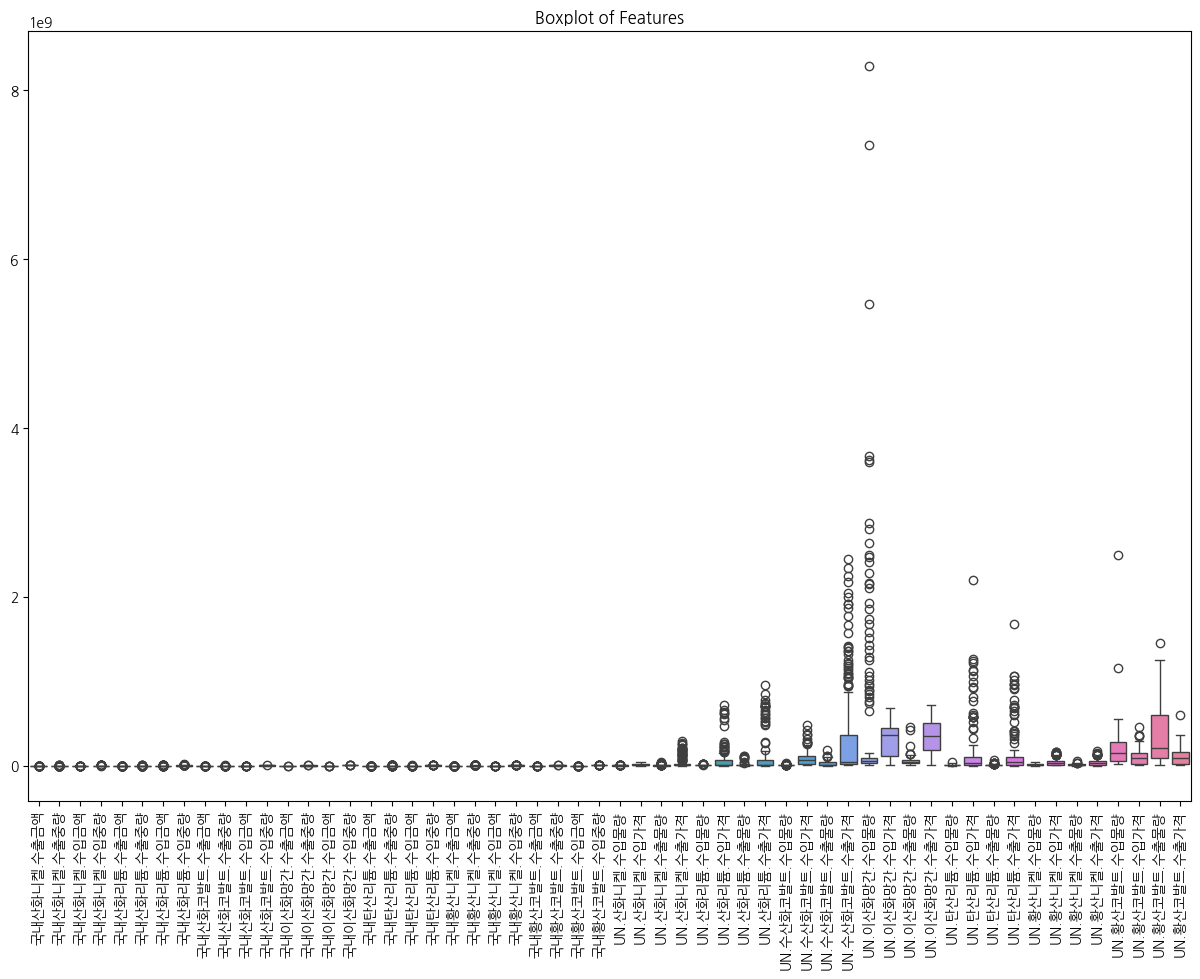

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 여러 변수에 대해 Boxplot 그리기
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()


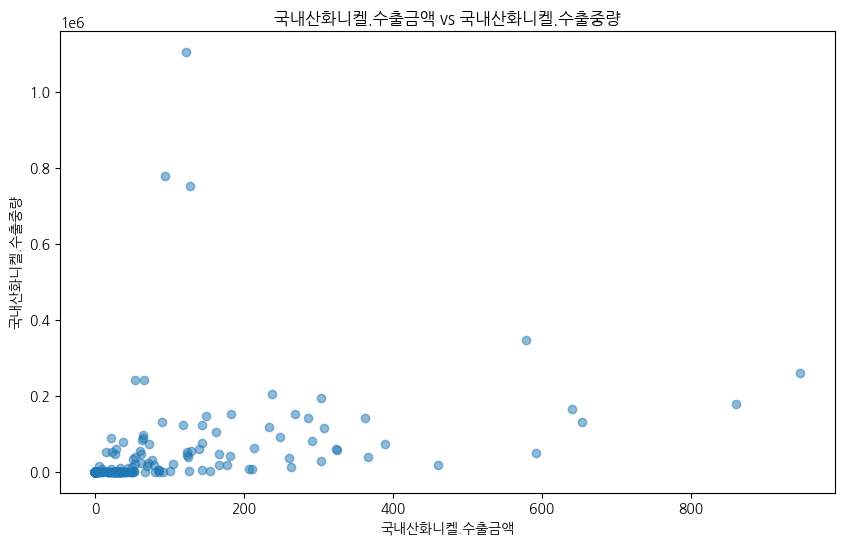

In [ ]:
# 변수 2개를 선택하여 Scatter Plot 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df['국내산화니켈.수출금액'], df['국내산화니켈.수출중량'], alpha=0.5)
plt.xlabel('국내산화니켈.수출금액')
plt.ylabel('국내산화니켈.수출중량')
plt.title('국내산화니켈.수출금액 vs 국내산화니켈.수출중량')
plt.show()


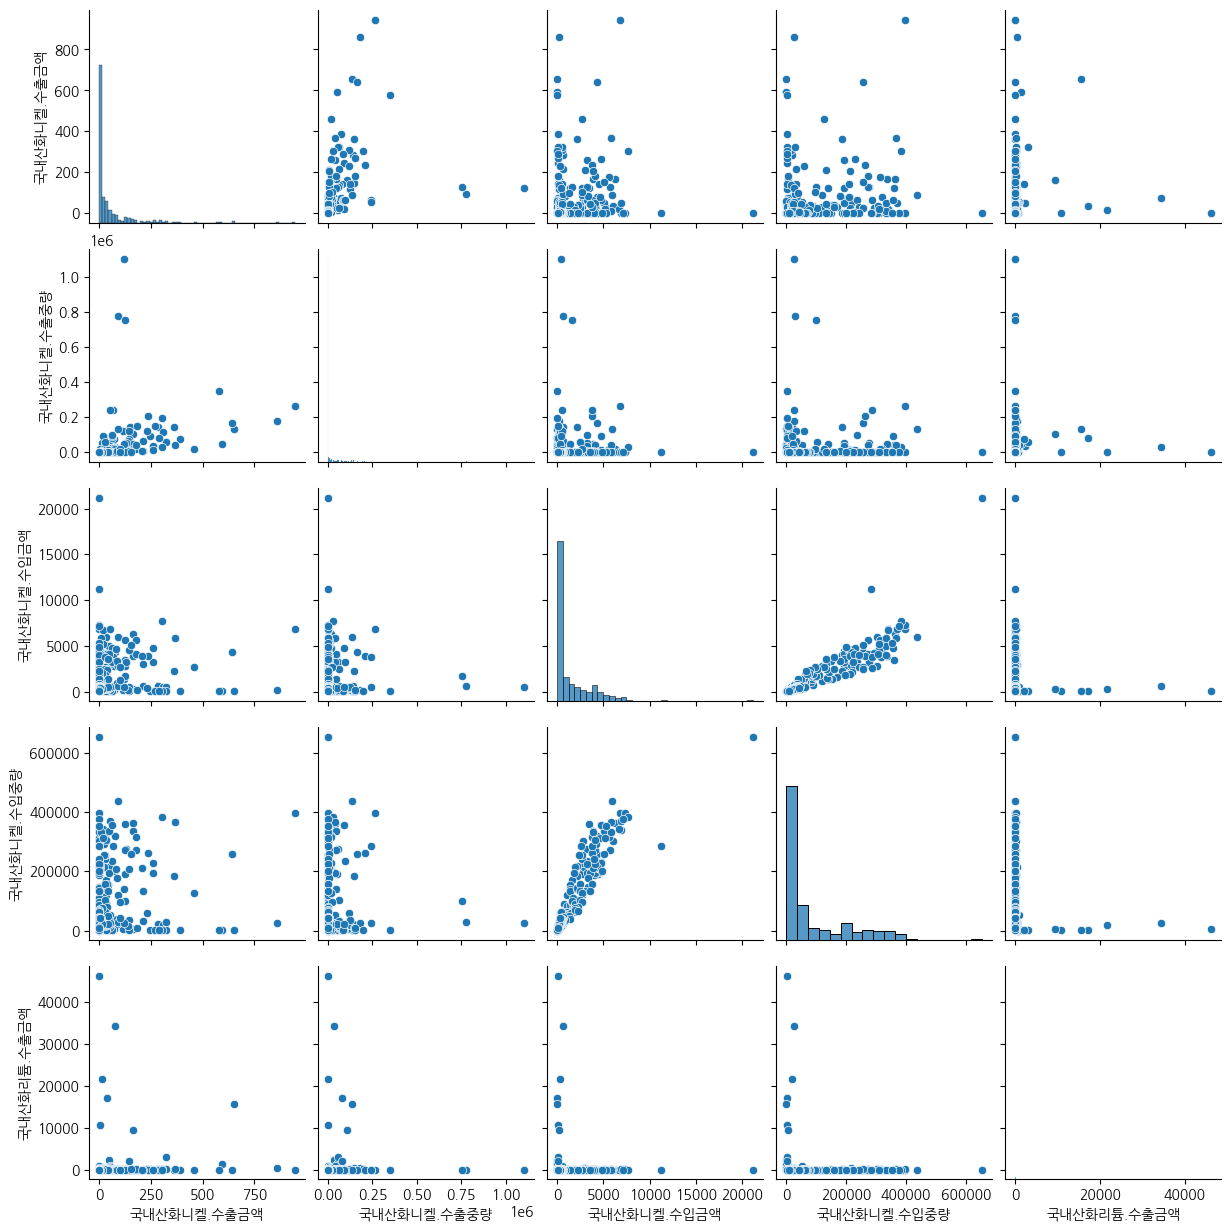

In [ ]:
import seaborn as sns

# 주요 변수 선택 (예: 상위 5개 변수)
selected_columns = df.columns[:5]

# 선택된 변수들에 대해 Pair Plot 그리기
sns.pairplot(df[selected_columns])
plt.show()


Index(['국내산화니켈.수출금액', '국내산화니켈.수출중량', '국내산화니켈.수입금액', '국내산화니켈.수입중량',
       '국내산화리튬.수출금액', '국내산화리튬.수출중량', '국내산화리튬.수입금액', '국내산화리튬.수입중량',
       '국내산화코발트.수출금액', '국내산화코발트.수출중량', '국내산화코발트.수입금액', '국내산화코발트.수입중량',
       '국내이산화망간.수출금액', '국내이산화망간.수출중량', '국내이산화망간.수입금액', '국내이산화망간.수입중량',
       '국내탄산리튬.수출금액', '국내탄산리튬.수출중량', '국내탄산리튬.수입금액', '국내탄산리튬.수입중량',
       '국내황산니켈.수출금액', '국내황산니켈.수출중량', '국내황산니켈.수입금액', '국내황산니켈.수입중량',
       '국내황산코발트.수출금액', '국내황산코발트.수출중량', '국내황산코발트.수입금액', '국내황산코발트.수입중량',
       'UN.산화니켈.수입물량', 'UN.산화니켈.수입가격', 'UN.산화니켈.수출물량', 'UN.산화니켈.수출가격',
       'UN.산화리튬.수입물량', 'UN.산화리튬.수입가격', 'UN.산화리튬.수출물량', 'UN.산화리튬.수출가격',
       'UN.수산화코발트.수입물량', 'UN.수산화코발트.수입가격', 'UN.수산화코발트.수출물량', 'UN.수산화코발트.수출가격',
       'UN.이산화망간.수입물량', 'UN.이산화망간.수입가격', 'UN.이산화망간.수출물량', 'UN.이산화망간.수출가격',
       'UN.탄산리튬.수입물량', 'UN.탄산리튬.수입가격', 'UN.탄산리튬.수출물량', 'UN.탄산리튬.수출가격',
       'UN.황산니켈.수입물량', 'UN.황산니켈.수입가격', 'UN.황산니켈.수출물량', 'UN.황산니켈.수출가격',
       'UN.황산코발트.수입물량', 'UN.황산코발트.수입가격', 'UN.황산코발트.수출물량', 'UN.황산코발트.수출가격'],
     

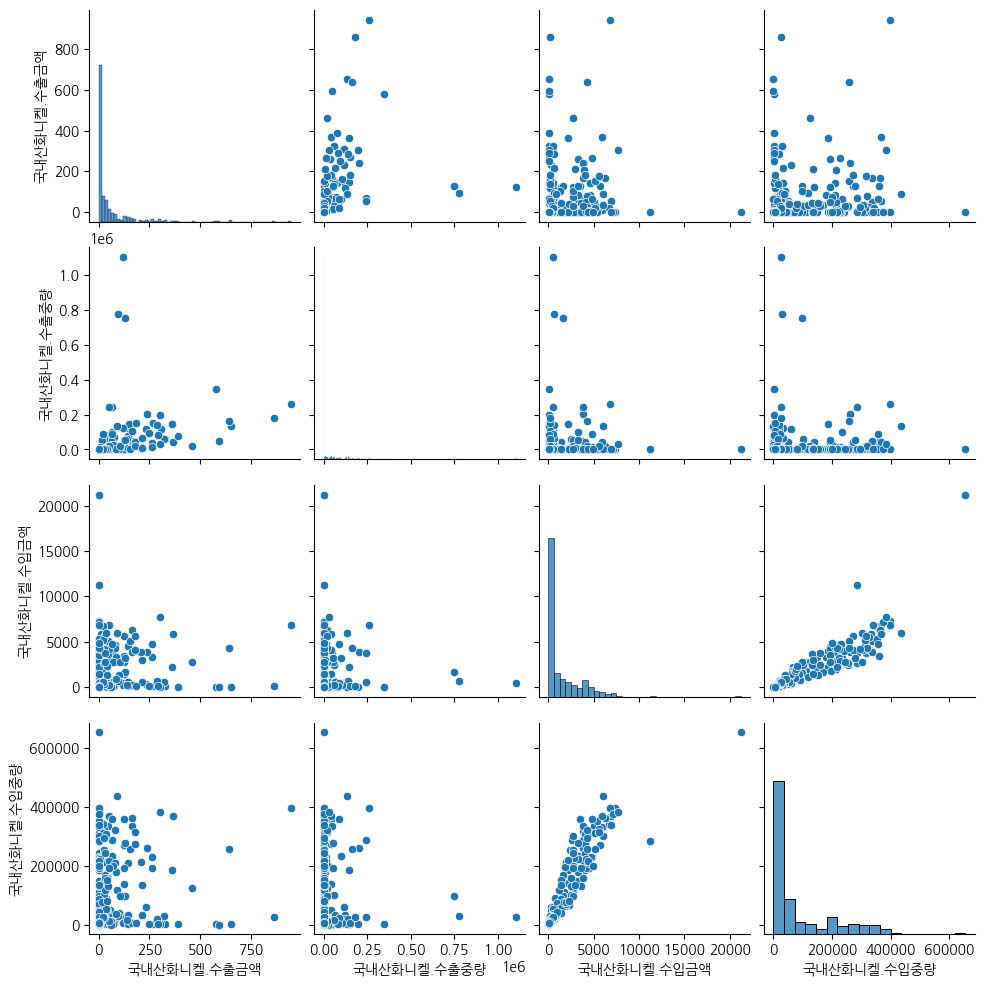

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임의 컬럼 이름 확인
print(df.columns)

# 데이터 프레임의 행 수 확인
print(f"전체 데이터 수: {len(df)}")

# 샘플 크기를 데이터 프레임의 행 수 이하로 설정
sample_size = min(1000, len(df))

# 데이터 샘플링
df_sample = df.sample(n=sample_size, random_state=42)

# 주요 변수 선택 (여기서는 임의로 5개 변수를 선택합니다)
selected_columns = ['국내산화니켈.수출금액', '국내산화니켈.수출중량', '국내산화니켈.수입금액', '국내산화니켈.수입중량']

# 선택된 변수들에 대해 Pair Plot 그리기
sns.pairplot(df_sample[selected_columns])
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


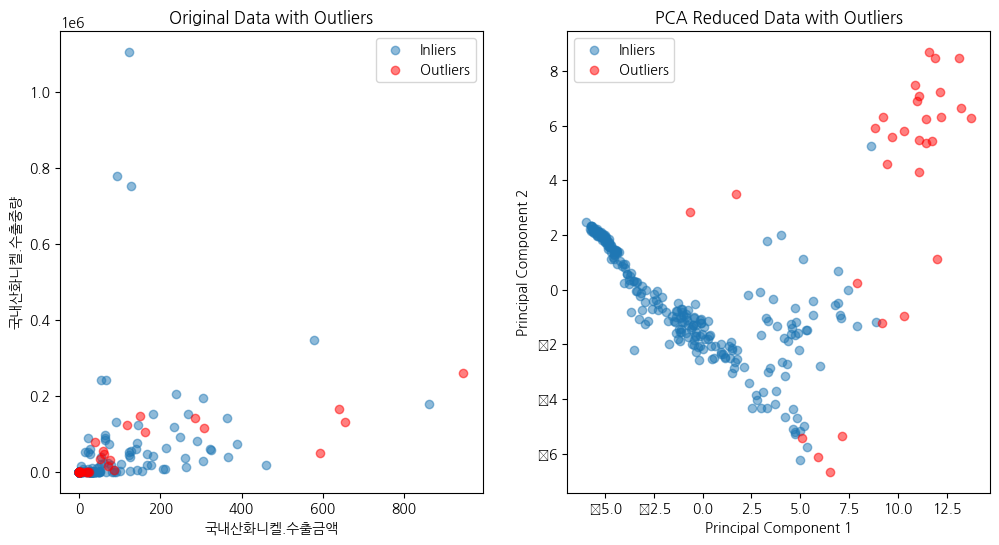

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# PCA로 차원 축소 (2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Isolation Forest를 사용한 이상치 탐지
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(df_scaled)

# 이상치와 정상 데이터 마스크
outlier_mask = outliers == -1
inlier_mask = outliers == 1

# 원래 데이터와 PCA 축소 데이터 시각화
plt.figure(figsize=(12, 6))

# 원래 데이터의 이상치
plt.subplot(1, 2, 1)
plt.scatter(df[inlier_mask]['국내산화니켈.수출금액'], df[inlier_mask]['국내산화니켈.수출중량'], label='Inliers', alpha=0.5)
plt.scatter(df[outlier_mask]['국내산화니켈.수출금액'], df[outlier_mask]['국내산화니켈.수출중량'], label='Outliers', alpha=0.5, color='red')
plt.xlabel('국내산화니켈.수출금액')
plt.ylabel('국내산화니켈.수출중량')
plt.title('Original Data with Outliers')
plt.legend()

# PCA 축소 데이터의 이상치
plt.subplot(1, 2, 2)
plt.scatter(df_pca[inlier_mask, 0], df_pca[inlier_mask, 1], label='Inliers', alpha=0.5)
plt.scatter(df_pca[outlier_mask, 0], df_pca[outlier_mask, 1], label='Outliers', alpha=0.5, color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduced Data with Outliers')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


이상치 개수: 15
정상 데이터 개수: 278


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


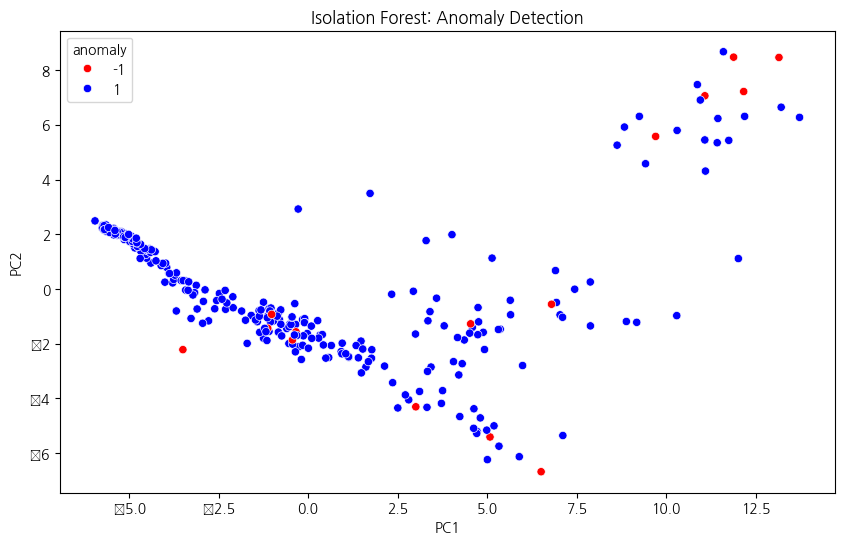

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 숫자 데이터만 선택 (날짜 데이터 제외)
numeric_df = df.select_dtypes(include=[float, int])

# NaN 값을 각 열의 평균값으로 대체
numeric_df = numeric_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# PCA 수행 (주성분 15개로)
pca = PCA(n_components=15)
pca_data = pca.fit_transform(scaled_data)

# PCA 결과를 데이터프레임으로 변환
pca_columns = [f'PC{i+1}' for i in range(15)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Isolation Forest 모델 훈련
iso_forest = IsolationForest(contamination=0.05, random_state=42)
pca_df['anomaly'] = iso_forest.fit_predict(pca_df)

# 이상치 필터링
outliers = pca_df[pca_df['anomaly'] == -1]
inliers = pca_df[pca_df['anomaly'] == 1]

# 결과 확인
print("이상치 개수:", len(outliers))
print("정상 데이터 개수:", len(inliers))

# 이상치 데이터 저장
outliers.to_csv('outliers.csv', index=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='anomaly', palette=['red', 'blue'])
plt.title('Isolation Forest: Anomaly Detection')
plt.show()
